# Malicious-URL

With this analysis, we explored some important features that have proved to be sound and effective in predicting phishing/malicious websites based on lexical characteristics of URL\.

We have 2 datasets: **top\-1m\.csv** (most visited domains) and **phishing\_verified\_online\.csv** as a collection of malicious URLs (where domains can be duplicated)\.


In [ ]:
# -*- coding: utf-8 -*-
# !pip install pandas
# !pip install matplotlib
# !pip install tldextract 
# !pip install ipaddress 
# !pip install seaborn 
# !pip install pickle 

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [ ]:
datapath = "./"

## 1\. Load Data 

The dataset **phishing\_verified\_online\.csv** has many items. However we only focus on the item "url"\.

In [ ]:
import os 
import pandas as pd 


# malicious = pd.read_csv(os.path.join(datapath, "phishing_verified_online.csv"))['url']
malicious = pd.read_csv('/home/aistudio/data/data54433/phishing_verified_online.csv')['url']
malicious = malicious.reset_index(drop=True)
malicious.head()

0    http://beautifulattendee.com/css/css/aol$MV4/i...
1                 http://www.grupbf18.whatsap-gr33.tk/
2                      http://bkpwhyaaa.hoaztbokep.ga/
3                  http://www.bkpwhyaaa.hoaztbokep.ga/
4                      http://whattsap.claimfreedm.gq/
Name: url, dtype: object

In [ ]:
len(malicious)

14989

In [ ]:
# non_malicious = pd.read_csv(os.path.join(datapath, "top-1m.csv"), header=None)[1]
non_malicious = pd.read_csv('/home/aistudio/data/data54434/top-1m.csv', header=None)[1]
non_malicious=non_malicious.reset_index(drop=True)

non_malicious = non_malicious[0:len(malicious)]
non_malicious.head()

0      google.com
1     youtube.com
2    facebook.com
3       tmall.com
4       baidu.com
Name: 1, dtype: object

In [ ]:
len(non_malicious)

14989

## 2\. Feature Selection 

Features:
- host name*
- domain*
- length of domain
- number of dots 
- number of delimeters (";", "_", "?", "=", "&")
- IP present as the host name 
- hyphen ("-") presence 
- "@" presence 
- "//" presence 
- sub dir ("/") presence 
- filename extension 
- sub domain 
- queries ("&")
- sensitive words
- port (wrong port presence)
- brand (presence of Google or something)
- number of digits 
- number of uppercase 

In [ ]:
import tldextract


# length of URL 
def getLength(url):
    return len(url)

# host name*
def getHostname(url):
    tuple = tldextract.extract(url)
    if tuple[0] != '':
        return '.'.join(tuple)
    else:
        return '.'.join(tuple[1:])

# domain*
def getDomain(url):
    return ".".join(tldextract.extract(url)[1:])

# number of dots 
def getDots(url):
    return url.count('.')

# number of delimeters (";", "_", "?", "=", "&")
def getDelims(url):
    count = 0 
    delims = [';', '_', '?', '=', '&']
    for i in url:
        if i in delims:
            count += 1
    return count 

If an IP address is used as an alternative of the domain name in the URL, such as “http://125.98.3.123/fake.html”, users can be sure that someone is trying to steal their personal information. Sometimes, the IP address is even transformed into hexadecimal code as shown in the following link “http://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html”\.

In [ ]:
import ipaddress as ip 


# IP present as the host name 
def isIP(url):
    domain = tldextract.extract(url)[1]
    try:
        if ip.ip_address(domain):
            return 1 
    except:
        return 0 

In [ ]:
# hyphen ("-") presence 
def getHyphen(url):
    return url.count('-')

Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol\.

In [ ]:
# "@" presence 
def getAT(url):
    return url.count('@')

The existence of “//” within the URL path means that the user will be redirected to another website. An example of such URL’s is: “http://www.legitimate.com//http://www.phishing.com”. We examine the presence of “//”\.

In [ ]:
# "//" presence 
def getDSlash(url):
    return url.count('//')

In [ ]:
from os.path import splitext
from urllib.parse import urlparse
import string 


# sub dir ("/") presence 
def getSubDir(url):
    return url.count('/')

# filename extension 
def getExt(url):
    return splitext(url)[1]

# sub domain
def getSubDomain(subdomain):
    if not subdomain:
        return 0
    else:
        return len(subdomain.split('.'))

# queries ("&")
def getQueries(query):
    if not query:
        return 0 
    else: 
        return len(query.split('&'))

# sensitive words
def getSensitive(url):
    sensitive = [
        'secure', 'security', 'account', 'webscr', 'bank', 'banking', 'login', 
        'ebayiaphi', 'sign', 'signin', 'confirm', 'porn', 'pornography', 'sexy', 
        'zip', 'cricket', 'link', 'work', 'party', 'gq', 'kim', 'country', 'science', 
        'tk', 
    ]
    for i in range (len(sensitive)):
        if sensitive[i] in url:
            return 1
    return 0

# port (wrong port presence)
def getWrongPort(url):
    _url = urlparse(url)
    port = _url.port
    if port is not None:
        return 1 
    return 0

# brand (presence of Google or something)
def getBrand(url):
    _url = urlparse(url)
    path = _url.path
    brand = [
        'Google', 'google', '53.com', 'Chase', 'Microsoft', 'microsoft', 'ANZ', 
        'Citibank', 'Paypal', 'AOL', 'eBay', 'USBank', 'E-Gold', 'Visa', 'Bankofamerica', 
        'Warcraft', 'Barclays', 'HSBC', 'Westpac', 'battle.net', 'LIoyds', 'yahoo', 'Yahoo',
    ]
    for i in range(len(brand)):
        if brand[i] in url:
            return 1 
    return 0 

# number of digits 
def getDigits(url):
    count = 0
    for i in range(len(url)):
        if url[i] in string.digits:
            count += 1
    return count 

# number of uppercase 
def getCountUpcase(url):
    count = 0
    for i in range(len(url)):
        if url[i] in string.ascii_uppercase:
            count += 1
    return count


In [ ]:
FeatureSet = pd.DataFrame(columns=(
    'url',
    'hostname*', 'domain*', 'length of domain', 'num of dots', 'num of delims', 'is IP', 'hyphen', '@', '//', 'sub dir', 
    'filename ext', 'sub domain', 'queries', 'sensitive', 'port', 'brand', 'num of digits', 'num of uppercase',
    'label',
    ))

def getFeatures(url, label):
    result = list()
    url = str(url)

    # url 
    result.append(url)

    path = urlparse(url)
    extract = tldextract.extract(url)

    # hostname*
    result.append(getHostname(url))
    # domain*
    result.append(getDomain(url))
    # length of domain 
    result.append(getLength(getDomain(url)))
    # num of dots
    result.append(getDots(extract.subdomain))
    # num of delims
    result.append(getDelims(url))
    # is IP
    result.append(isIP(url))
    # hyphen
    result.append(getHyphen(path.netloc))
    # @ 
    result.append(getAT(path.netloc))
    # // 
    result.append(getDSlash(path.path))
    # sub dir 
    result.append(getSubDir(path.path))
    # filename ext 
    result.append(getExt(url))
    # sub domain
    result.append(getSubDomain(extract.subdomain))
    # queries
    result.append(len(path.query))
    # sensitive
    result.append(getSensitive(url))
    # port 
    result.append(getWrongPort(url))
    # brand
    result.append(getBrand(url))
    # num of digits
    result.append(getDigits(url))
    # num of uppercase
    result.append(getCountUpcase(url))
    # label 
    result.append(str(label))
    return result


i = 0
for i in range(len(malicious)):
    feature = getFeatures(malicious.loc[i], 1)
    FeatureSet.loc[i] = feature

for j in range(len(non_malicious)):
    feature = getFeatures(non_malicious.loc[j], 0)
    FeatureSet.loc[j+i] = feature

## 3\. Visualization  

In [ ]:
FeatureSet

,url,hostname*,domain*,length of domain,num of dots,num of delims,is IP,hyphen,@,//,sub dir,filename ext,sub domain,queries,sensitive,port,brand,num of digits,num of uppercase,label
0,http://beautifulattendee.com/css/css/aol$MV4/i...,beautifulattendee.com,beautifulattendee.com,21,0,6,0,0,0,0,4,.php?cmd=_account-details&amp;session=idcElTsb...,0,133,1,0,0,15,41,1
1,http://www.grupbf18.whatsap-gr33.tk/,www.grupbf18.whatsap-gr33.tk,whatsap-gr33.tk,15,1,0,0,1,0,0,1,,2,0,1,0,0,4,0,1
2,http://bkpwhyaaa.hoaztbokep.ga/,bkpwhyaaa.hoaztbokep.ga,hoaztbokep.ga,13,0,0,0,0,0,0,1,,1,0,0,0,0,0,0,1
3,http://www.bkpwhyaaa.hoaztbokep.ga/,www.bkpwhyaaa.hoaztbokep.ga,hoaztbokep.ga,13,1,0,0,0,0,0,1,,2,0,0,0,0,0,0,1
4,http://whattsap.claimfreedm.gq/,whattsap.claimfreedm.gq,claimfreedm.gq,14,0,0,0,0,0,0,1,,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29972,coach.com,coach.com,coach.com,9,0,0,0,0,0,0,0,.com,0,0,0,0,0,0,0,0
29973,webengage.com,webengage.com,webengage.com,13,0,0,0,0,0,0,0,.com,0,0,0,0,0,0,0,0
29974,sudact.ru,sudact.ru,sudact.ru,9,0,0,0,0,0,0,0,.ru,0,0,0,0,0,0,0,0
29975,trendhunter.com,trendhunter.com,trendhunter.com,15,0,0,0,0,0,0,0,.com,0,0,0,0,0,0,0,0


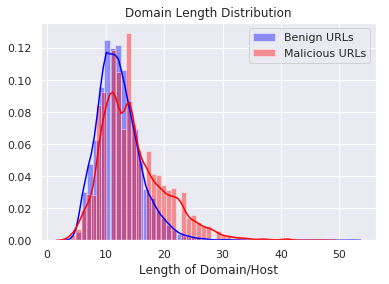

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle as pkl 


# Domain Length Distribution 
sns.set(style="darkgrid")
sns.distplot(FeatureSet[FeatureSet['label']=='0']['length of domain'],color='blue',label='Benign URLs')
sns.distplot(FeatureSet[FeatureSet['label']=='1']['length of domain'],color='red',label='Malicious URLs')
# sns.plt.title('Domain Length Distribution')
plt.legend(loc='upper right')
plt.xlabel('Length of Domain/Host')
plt.title('Domain Length Distribution')
plt.show()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


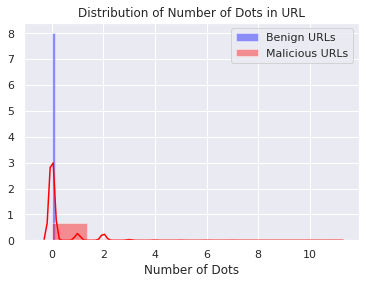

In [ ]:
# Distribution of Number of Dots in URL
x=FeatureSet[FeatureSet['label']=='0']['num of dots']
y=FeatureSet[FeatureSet['label']=='1']['num of dots']
# plt.hist(x,bins=8, alpha=0.9, label='Benign URLs',color='blue')
sns.distplot(x,bins=8,color='blue',label='Benign URLs')
# plt.hist(y,bins=10, alpha=0.6, label='Malicious URLs',color='red')
sns.distplot(y,bins=8,color='red',label='Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('Number of Dots')
plt.title('Distribution of Number of Dots in URL')
plt.show()

## 4\. Machine Learning 

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import model_selection
import numpy as np 

In [116]:
x = list()
y = list()
raw = FeatureSet.values.tolist()
for i in range(len(raw)):
    tmp = raw[i]
    x_tmp = tmp[3:11] + tmp[12:19]
    x.append(x_tmp)
    y.append(tmp[-1])

In [117]:
x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1, test_size=0.3)

In [118]:
print('x len:', len(x))
print('y len:', len(y))

y

x len: 29977
y len: 29977


array(['1', '1', '1', ..., '0', '0', '0'], dtype='<U1')

In [165]:
# SVM
clf = svm.SVC(C=0.5, kernel='rbf', decision_function_shape='ovr')
# clf = svm.SVC(C=0.3, kernel='linear', decision_function_shape='ovr')

In [150]:
def show_accuracy(a, b, tip):
    acc = (a == b)
    print('%s Accuracy:%.3f' %(tip, np.mean(acc)))

def print_accuracy(clf,x_train,y_train,x_test,y_test):
    print("training data prediction: %.3f "%(clf.score(x_train, y_train)))
    print("testing data prediction: %.3f "%(clf.score(x_test, y_test)))
    # compare original results and predicted results
    show_accuracy(clf.predict(x_train), y_train, "training data")
    show_accuracy(clf.predict(x_test), y_test, "testing data")
    # calculate decision function 
    # the three values represent the distance of x to each split plane
    # print("decision_function:\n", clf.decision_function(x_train))

def show_recall(y, y_hat, tip):
    print('%s Recall:%.3f' % (tip, float(np.sum(y==y_hat)) / len(y)))

def print_recall(clf,x_train,y_train,x_test,y_test):
    show_recall(y_train, clf.predict(x_train), 'training data')
    show_recall(y_test, clf.predict(x_test), 'testing data')

In [166]:
clf.fit(x_train, y_train) 
print_accuracy(clf, x_train, y_train, x_test, y_test)
print_recall(clf,x_train,y_train,x_test,y_test)

training data prediction: 0.962 
testing data prediction: 0.959 
training data Accuracy:0.962
testing data Accuracy:0.959
training data Recall:0.962
testing data Recall:0.959


## 5\. Test 

In [172]:
def predict(url):
    x= list()
    tmp = getFeatures(url, 1)
    x_tmp = tmp[3:11] + tmp[12:19]
    x.append(x_tmp)
    result = clf.predict(x)
    # print(result)
    if(result[0] == '0'):
        print(url, ' non-malicious one!')
    else:
        print(url, ' malicious one!')
        

predict('http://google.com')
predict('http://baidu.com')
predict('http://blog.csdn.net') 
predict('http://aistudio.baidu.com')
predict('http://snnbcloginz.xyz/') # error !!!
predict('https://m-o-f-365.oa.r.appspot.com')
predict('https://onedrive-secure.df.r.appspot.com')
predict('https://smbccard.top/pc/index.php')

http://google.com  non-malicious one!
http://baidu.com  non-malicious one!
http://blog.csdn.net  non-malicious one!
http://aistudio.baidu.com  non-malicious one!
http://snnbcloginz.xyz/  non-malicious one!
https://m-o-f-365.oa.r.appspot.com  malicious one!
https://onedrive-secure.df.r.appspot.com  malicious one!
https://smbccard.top/pc/index.php  malicious one!
